In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.lib.stride_tricks import sliding_window_view

In [22]:
lines = []
id = [21,22,23]
for i in id:
  with open(f"Dane\Learning_data\wind_min_merge_{i}.lst", "r") as file:
    for line in file:
      lines.append(line.split()[4:])

In [26]:
df = pd.DataFrame(lines, columns=["Field_Magnitude", "Bx", "By", "Bz", "Vx", "Vy", "Vz", "Xgse", "Ygse", "Zgse"])

In [27]:

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1582560 entries, 0 to 1582559
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   Field_Magnitude  1582560 non-null  object
 1   Bx               1582560 non-null  object
 2   By               1582560 non-null  object
 3   Bz               1582560 non-null  object
 4   Vx               1582560 non-null  object
 5   Vy               1582560 non-null  object
 6   Vz               1582560 non-null  object
 7   Xgse             1582560 non-null  object
 8   Ygse             1582560 non-null  object
 9   Zgse             1582560 non-null  object
dtypes: object(10)
memory usage: 120.7+ MB
None
  Field_Magnitude    Bx    By     Bz       Vx       Vy       Vz     Xgse  \
0            3.19  2.50  1.97  -0.15  99999.9  99999.9  99999.9  9999.99   
1            3.13  2.57  1.78  -0.03  99999.9  99999.9  99999.9  9999.99   
2            3.07  2.61  1.62  -0.04   -297.4  

In [28]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7): int(n*0.9)]
test_df = df[int(n*0.9):]

print("Training length:", len(train_df))
print("Validation length:", len(val_df))
print("Test length:", len(test_df))

Training length: 1107792
Validation length: 316512
Test length: 158256


C:\Users\erosi\AppData\Local\Temp\ipykernel_244\2026671614.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  _ = ax.set_xticklabels(df.keys(), rotation=90)


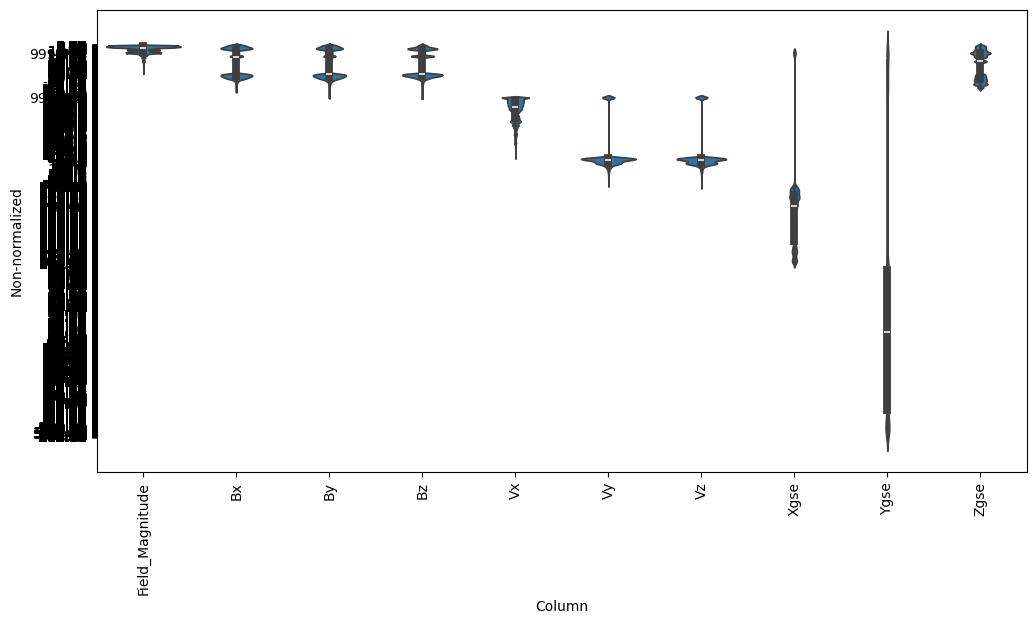

In [31]:
df_non = df.copy()
df_non = df_non.melt(var_name='Column', value_name='Non-normalized')

plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Non-normalized', data=df_non)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [32]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

In [ ]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Col', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Col', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [ ]:
train_df.to_csv("Dane/Learning_data/data/training_df.csv", index=False)
val_df.to_csv("Dane/Learning_data/data/val_df.csv", index=False)
test_df.to_csv("Dane/Learning_data/test_df.csv", index=False)

In [ ]:
window_size = 30
data_sliced_train = sliding_window_view(train_df, window_shape=window_size)